# SRIHARI MOHAN - 23069726

In [ ]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, kurtosis

In [51]:
data = pd.read_csv('movies.csv')

data.head()

,Rank,Title,Year,Score,Metascore,Genre,Vote,Director,Runtime,Revenue,Description
0,1,The Shawshank Redemption,1994,9.3,80.0,Drama,2011509,Frank Darabont,142,28.34,Two imprisoned men bond over a number of years...
1,2,The Dark Knight,2008,9.0,84.0,"Action, Crime, Drama",1980200,Christopher Nolan,152,534.86,When the menace known as the Joker emerges fro...
2,3,Inception,2010,8.8,74.0,"Action, Adventure, Sci-Fi",1760209,Christopher Nolan,148,292.58,A thief who steals corporate secrets through t...
3,4,Fight Club,1999,8.8,66.0,Drama,1609459,David Fincher,139,37.03,An insomniac office worker and a devil-may-car...
4,5,Pulp Fiction,1994,8.9,94.0,"Crime, Drama",1570194,Quentin Tarantino,154,107.93,"The lives of two mob hitmen, a boxer, a gangst..."


In [53]:
data.describe()

,Rank,Year,Score,Metascore,Vote,Runtime,Revenue
count,10000.00000,10000.000000,10000.000000,6781.000000,1.000000e+04,10000.000000,7473.000000
mean,5000.50000,1998.116200,6.627530,56.534140,6.448852e+04,108.696900,36.263402
std,2886.89568,18.249608,1.041204,17.965689,1.249423e+05,21.659929,60.882025
min,1.00000,1915.000000,1.300000,10.000000,6.015000e+03,45.000000,0.000000
25%,2500.75000,1991.000000,6.000000,44.000000,1.014725e+04,94.000000,1.890000
50%,5000.50000,2004.000000,6.700000,57.000000,2.117250e+04,105.000000,15.090000
75%,7500.25000,2011.000000,7.400000,70.000000,6.205200e+04,118.000000,43.860000
max,10000.00000,2018.000000,9.600000,99.000000,2.011509e+06,450.000000,936.660000


In [55]:
# DATA PREPROCESSING
def preprocess_data(data):
    numeric_cols = ['Score', 'Metascore', 'Vote', 'Revenue']
    
    for col in numeric_cols:
        if col in data:
            data[col] = pd.to_numeric(data[col], errors='coerce')
            data[col].fillna(data[col].median(), inplace=True)
    
    if 'Genre' in data:
        data['Genre'].fillna('Unknown', inplace=True)
        data = pd.get_dummies(data, columns=['Genre'], drop_first=True)
    
    # SCALING NUMERIC FEATURES
    scaler = StandardScaler()
    numerical_cols = [col for col in numeric_cols if col in data]
    if numerical_cols:
        data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    
    return data
    
    # APPLYING PREPROCESSING FUNCTION
data = preprocess_data(data)

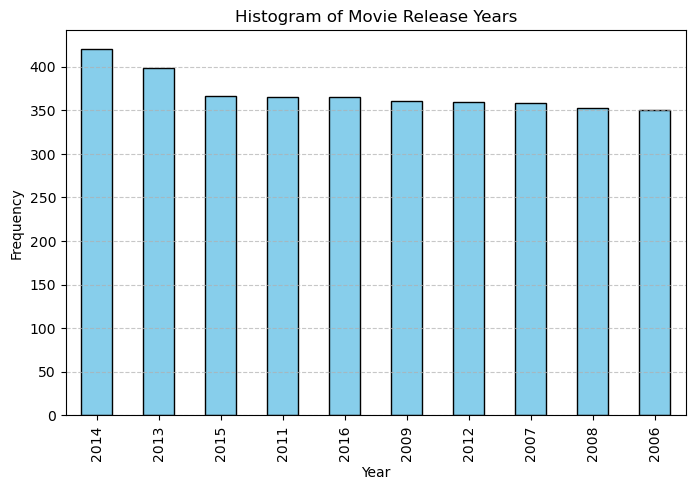

In [75]:
def plot_histogram(data, column, title='Histogram'):
    if column in data:
        plt.figure(figsize=(8, 5))
        data[column].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

plot_histogram(data, 'Year', title='Histogram of Movie Release Years')

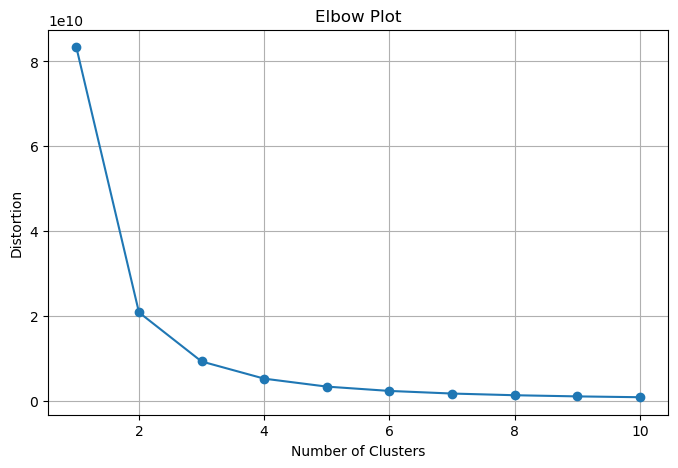

In [59]:
# PLOT 2 - ELBOW PLOT
def plot_elbow(data, max_clusters=10):
    numeric_data = data.select_dtypes(include=[np.number])
    distortions = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(numeric_data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.grid()
    plt.show()

if data.select_dtypes(include=[np.number]).shape[1] >= 2:
    plot_elbow(data, max_clusters=10)

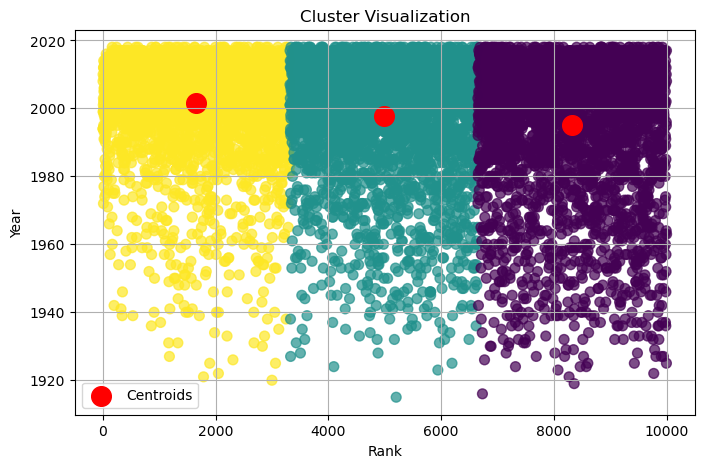

In [60]:
# PLOT 3 - SCATTER PLOT FOR K-MEANS VISUALIZATION
def plot_clusters(data, n_clusters):
    numeric_data = data.select_dtypes(include=[np.number])
    if numeric_data.shape[1] < 2:
        print("Not enough numeric features for clustering visualization.")
        return
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    labels = kmeans.fit_predict(numeric_data)

    plt.figure(figsize=(8, 5))
    plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
    plt.title('Cluster Visualization')
    plt.xlabel(numeric_data.columns[0])
    plt.ylabel(numeric_data.columns[1])
    plt.legend()
    plt.grid()
    plt.show()

plot_clusters(data, n_clusters=3)

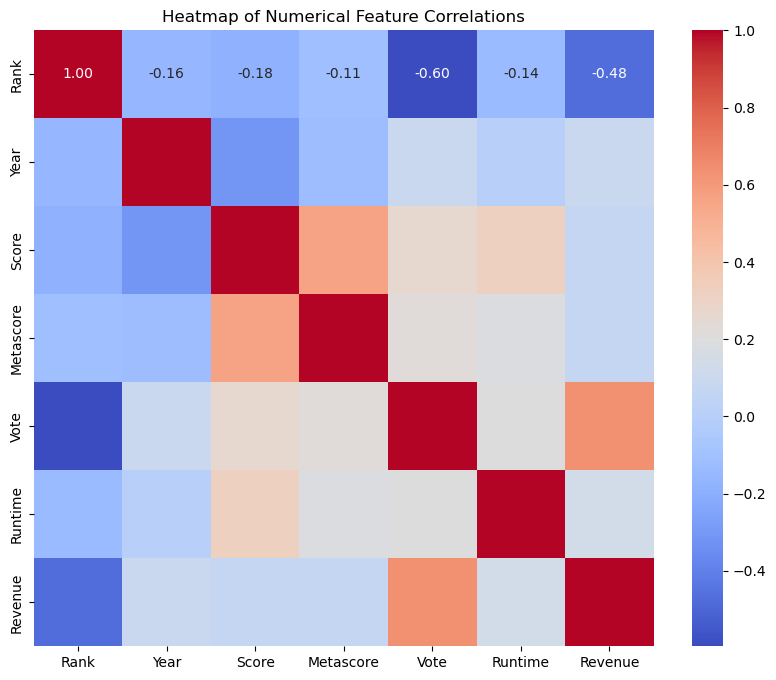

In [61]:
# PLOT 4 - HEATMAP
def plot_heatmap(data):
    numeric_data = data.select_dtypes(include=[np.number])
    if not numeric_data.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Heatmap of Numerical Feature Correlations')
        plt.show()

plot_heatmap(data)

In [62]:
# STATISTICAL METRICS
def calculate_statistics(data):
    numeric_data = data.select_dtypes(include=[np.number])
    for col in numeric_data.columns:
        print(f"{col} - Skewness: {skew(numeric_data[col]):.2f}, Kurtosis: {kurtosis(numeric_data[col]):.2f}")

calculate_statistics(data)

Rank - Skewness: 0.00, Kurtosis: -1.20
Year - Skewness: -1.55, Kurtosis: 2.27
Score - Skewness: -0.87, Kurtosis: 1.71
Metascore - Skewness: -0.14, Kurtosis: 0.57
Vote - Skewness: 5.42, Kurtosis: 44.39
Runtime - Skewness: 2.11, Kurtosis: 13.59
Revenue - Skewness: 4.93, Kurtosis: 38.83


In [71]:
# PREPARING DATA FOR MODELING
def prepare_model_data(data):
    target = 'Revenue'
    features = ['Metascore', 'Vote', 'Score']
    if target not in data or not all([col in data for col in features]):
        print("Missing necessary columns for modeling.")
        return None, None, None, None

    X = data[features]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

Mean Squared Error (MSE): 0.71
R-squared (R2): 0.42

Model Coefficients:
            Coefficient
Metascore    -0.036010
Vote          0.657634
Score        -0.088157


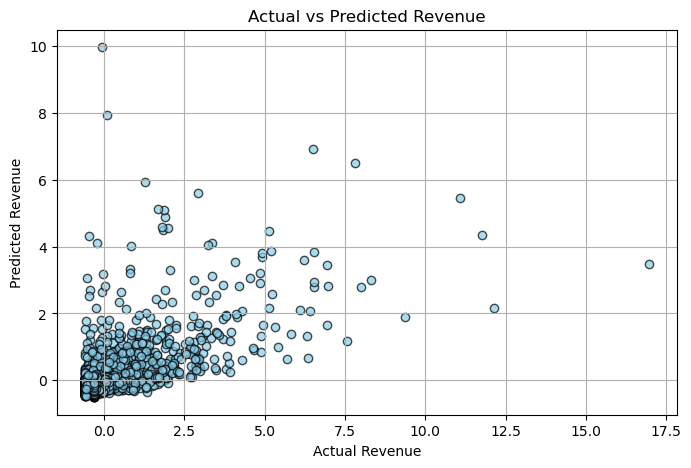

Prediction for new data [[8.0e+01 2.0e+04 7.5e+00]]: 13149.14


C:\Users\smart\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [73]:
# TRAIN A REGRESSION MODEL
def train_and_evaluate(X_train, X_test, y_train, y_test):

    if X_train is None or y_train is None:
        print("Training data is not prepared. Exiting.")
        return
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # MODEL EVALUATION
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    
    #COEFFICIENTS
    coef_df = pd.DataFrame(model.coef_, index=X_train.columns, columns=['Coefficient'])
    print("\nModel Coefficients:\n", coef_df)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Actual vs Predicted Revenue')
    plt.xlabel('Actual Revenue')
    plt.ylabel('Predicted Revenue')
    plt.grid()
    plt.show()
    
    new_data = np.array([[80, 20000, 7.5]])  # Example: [Metascore, Vote, Score]
    prediction = model.predict(new_data)
    print(f"Prediction for new data {new_data}: {prediction[0]:.2f}")

X_train, X_test, y_train, y_test = prepare_model_data(data)
train_and_evaluate(X_train, X_test, y_train, y_test)